In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 200)

In [3]:
# Importing dataset

leadInfo = pd.read_csv(r"C:\Users\DR.PLENKA\OneDrive\Desktop\Upgrade\Lead scoring case study\Leads.csv",encoding='utf-8',engine='python')

leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# inspect leadInfo dataframe

print("*********************************  Info *******************************************") 
print(leadInfo.info())
print("*********************************  Shape ******************************************") 
print(leadInfo.shape)
print("**************************** Columns having null values *****************************")
print(leadInfo.isnull().any())
print("**************************** Describe *****************************")
leadInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Data Cleaning

In [5]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
# Check if there are any duplicate values in the dataset

leadInfo[leadInfo.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [7]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

leadInfo['Specialization'] = leadInfo['Specialization'].replace('Select', np.nan)
leadInfo['How did you hear about X Education'] = leadInfo['How did you hear about X Education'].replace('Select', np.nan)
leadInfo['Lead Profile'] = leadInfo['Lead Profile'].replace('Select', np.nan)
leadInfo['City'] = leadInfo['City'].replace('Select', np.nan)

In [8]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Let us drop the following columns that have more than 40% null values


# a) How did you hear about X Education
# b) Lead Quality
# c) Lead Profile
# d) City
# e) Asymmetrique Activity Index
# f) Asymmetrique Profile Index
# g) Asymmetrique Activity Score
# h) Asymmetrique Profile Score

leadInfo = leadInfo.drop(['How did you hear about X Education', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [10]:
# Drop the score variable
# Tags
leadInfo = leadInfo.drop(['Tags'], axis=1)

In [11]:
# check for percentage of null values in each column after dropping columns having more than 40% null values

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Following columns have null values :

- Country
- Specialization
- Lead Source
- Total Visits
- Page Views Per Visit
- Last Activity    
- What is your current occupation
- What matters most to you in choosing a course
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [12]:
# Lets check the value counts for each values in the country column

leadInfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
Ghana                      2
Asia/Pacific Region        2
Bangladesh                 2
Netherlands                2
China                      2
Uganda                     2
Italy                      2
Philippines                2
Belgium                    2
Malaysia                   1
Sri Lanka                  1
Liberia                    1
Russia                     1
Vietnam                    1
Switzerland                1
Indonesia     

In [13]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leadInfo[leadInfo['Country'] == 'India'])/len(leadInfo['Country']),2)
print(country_percentage)

70.26


In [14]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leadInfo = leadInfo.drop(['Country'], axis=1)

In [15]:
# Check the value counts for the column Lead Source

leadInfo['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [16]:
# Also since there is no value specified ,replace the null value with "Not specified"  
leadInfo['Specialization'] = leadInfo['Specialization'].replace(np.nan, 'Not specified')
#lead_data['Specialization'].fillna('Not specified',inplace=True)

In [17]:
leadInfo['Specialization'].value_counts()

Not specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
# Check the value counts for the column Lead Source

leadInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
blog                    1
WeLearn                 1
testone                 1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [19]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('google', 'Google')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(np.nan, 'Google')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('blog', 'Other')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('testone', 'Other')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('NC_EDM', 'Other')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('welearnblog_Home', 'Other')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('Pay per Click Ads', 'Other')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('WeLearn', 'Other')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('youtubechannel', 'Other')


In [20]:

leadInfo['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other                  7
bing                   6
Click2call             4
Press_Release          2
Live Chat              2
Social Media           2
Name: Lead Source, dtype: int64

In [21]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


In [22]:
# Check the value counts for the column Total Visits

leadInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [23]:
# Check the median of column 

leadInfo['TotalVisits'].median()

3.0

In [24]:
# We shall impute the null values in TotalVisits by the median value which is 3.0 as outliers present

leadInfo['TotalVisits'] = leadInfo['TotalVisits'].replace(np.nan, leadInfo['TotalVisits'].median())

In [25]:
# Check the value counts for Page Views Per Visit

leadInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [26]:
# Check the median of the column

leadInfo['Page Views Per Visit'].median()

2.0

In [27]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

leadInfo['Page Views Per Visit'] = leadInfo['Page Views Per Visit'].replace(np.nan, leadInfo['Page Views Per Visit'].median())

In [28]:
# Check the value counts for the column Last Activity

leadInfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [29]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leadInfo['Last Activity'] = leadInfo['Last Activity'].replace(np.nan, 'Not Sure')

In [30]:
# Check the value counts for the column "What is your current Occupation"

leadInfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(np.nan, 'No Information')

In [32]:
# Check the value counts for the column What matters most to you in choosing a course 

leadInfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
matters_most_percentage = round(100*len(leadInfo[leadInfo['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leadInfo['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [34]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)

In [35]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

All the null values in the columns now have either been imputed or we have dropped the columns which have more than 70% data concentrated towards one value

In [36]:
leadInfo.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
leadInfo['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [38]:
leadInfo['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [39]:
leadInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [40]:
leadInfo['Last Activity'].value_counts()


Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [41]:
leadInfo['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [42]:
leadInfo['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [43]:
leadInfo['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [44]:
leadInfo['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [45]:
leadInfo['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [46]:
leadInfo['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [47]:
leadInfo['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [48]:
leadInfo['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [49]:
leadInfo['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [50]:
leadInfo['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [51]:
leadInfo['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [52]:
leadInfo['A free copy of Mastering The Interview'].value_counts()


No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [53]:
leadInfo['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [54]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leadInfo = leadInfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                         'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [55]:
leadInfo.shape

(9240, 21)

# Outlier treatment

In [56]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

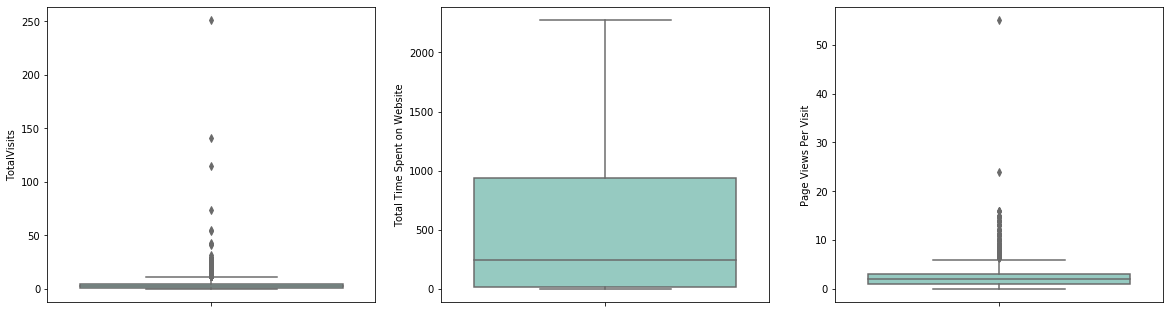

In [57]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leadInfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leadInfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leadInfo)
plt.show()

In [58]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leadInfo['TotalVisits'].quantile(0.99)
leadInfo = leadInfo[leadInfo["TotalVisits"] < nn_quartile_total_visits]
leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [59]:
leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [60]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leadInfo['Page Views Per Visit'].quantile(0.99)
leadInfo = leadInfo[leadInfo["Page Views Per Visit"] < nn_quartile_page_visits]
leadInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [61]:
# Determine the percentage of data retained

num_data = round(100*(len(leadInfo)/9240),2)
print(num_data)

97.72


At this point data has been cleaned.

# Step3: Data Analysis

Lets understand categorical data by univariate data analysis.

In [62]:
leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,No,No,No,No,No,No,No,Modified


In [63]:
def univar_graph(df, col, vartype):
    plt.figure(figsize = (7,5))
    sns.countplot(leadInfo[col], hue=leadInfo['Converted'])
    plt.ylabel('Lead Number')
    plt.xlabel(col)
    plt.xticks(rotation=90)

In [64]:
leadInfo.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [65]:
leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,No,No,No,No,No,No,No,Modified


In [66]:
# Drop the Prospect ID column
leadInfo = leadInfo.drop(['Prospect ID'], axis = 1) ##Prospect ID and Lead Number have the same number of unique values

In [67]:
leadInfo.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

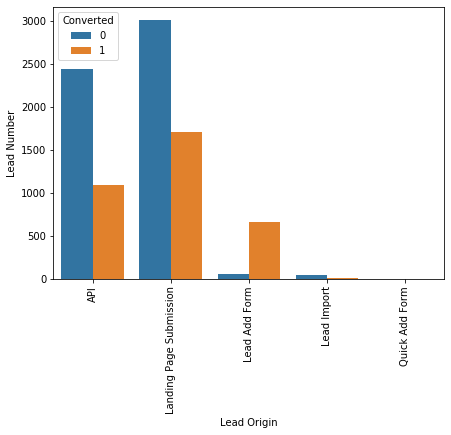

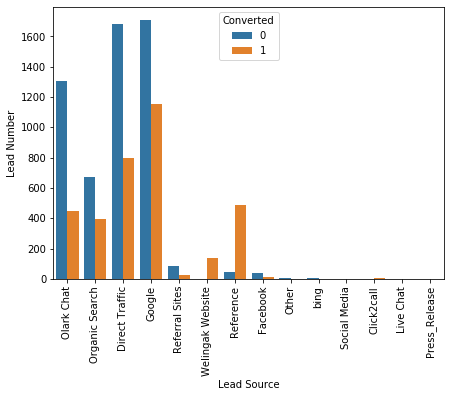

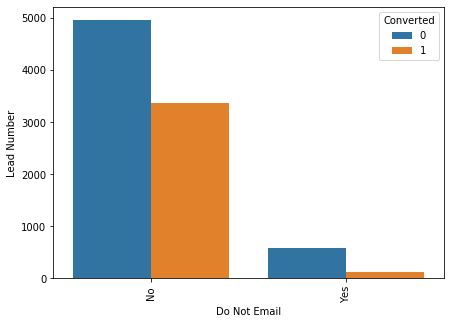

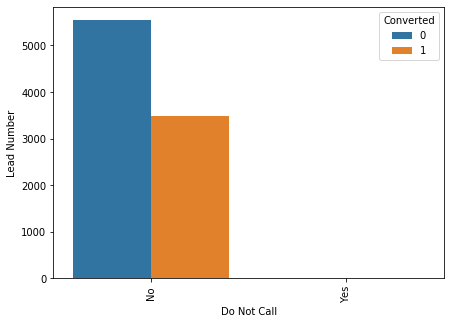

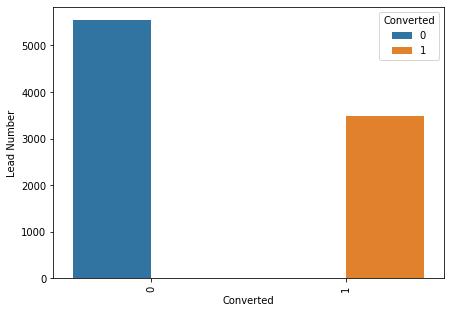

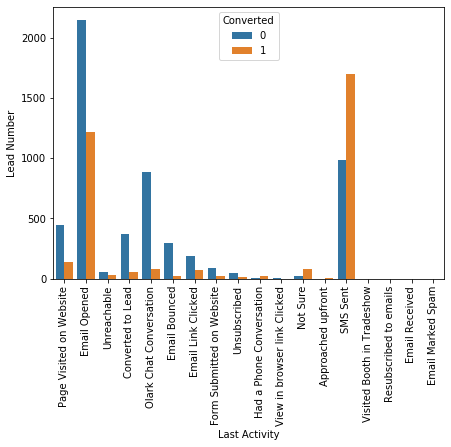

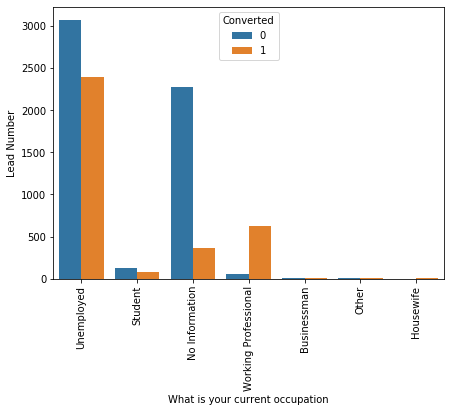

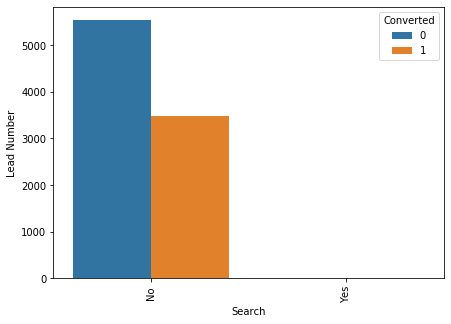

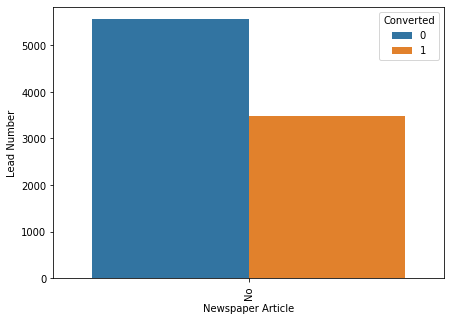

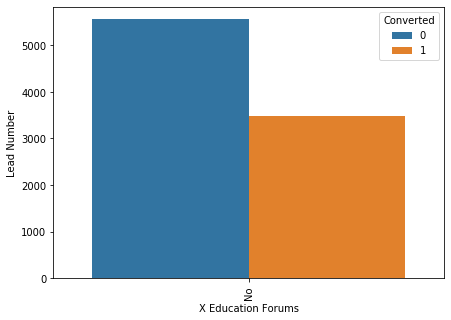

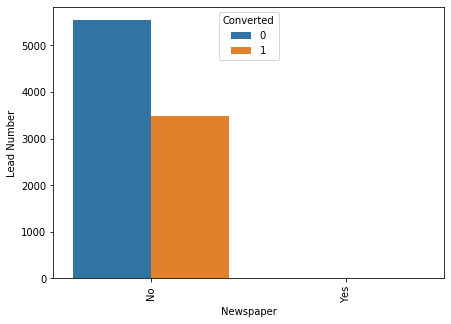

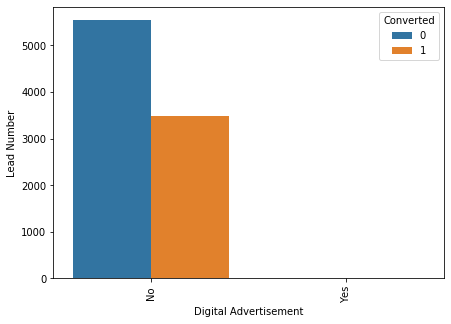

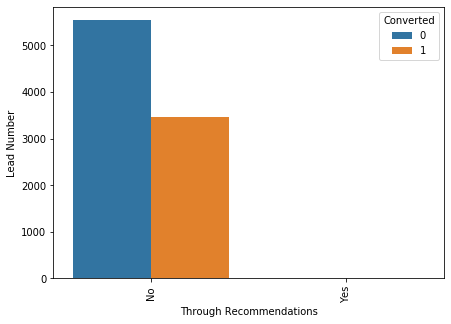

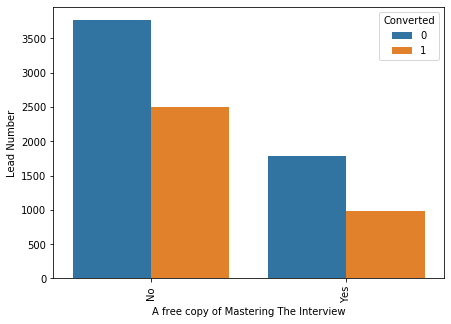

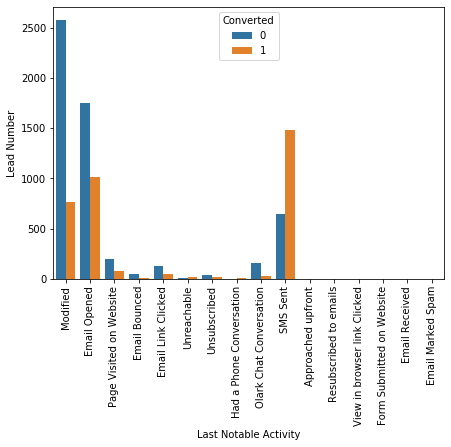

In [68]:
col_graph = leadInfo[['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'Last Activity',
       'What is your current occupation',
       'Search','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]
for item in col_graph:
    univar_graph(df=leadInfo,col=item,vartype=1)

In [69]:
# Drop the columns which has negligible conversion like values '1'
# Newspaper Article
# X Education Forums
# Newspaper
leadInfo = leadInfo.drop(['Newspaper Article', 'X Education Forums', 'Newspaper'], axis=1)

In [70]:
leadInfo.shape

(9029, 17)

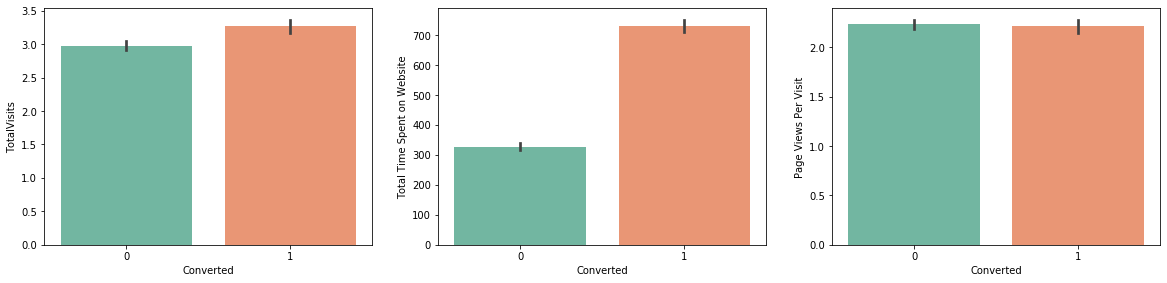

In [71]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadInfo)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# step 4: Creating Dummies

In [72]:
# Converting some binary variables (Yes/No) to 0/1
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Do Not Call
# Search
# Newspaper Article
# X Education Forums
# Newspaper
# Digital Advertisement
# Through Recommendations
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadInfo[variablelist] = leadInfo[variablelist].apply(binary_map)

In [73]:
leadInfo['Lead Origin'].value_counts()

Landing Page Submission    4716
API                        3540
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [74]:
leadInfo['Lead Source'].value_counts()

Google              2864
Direct Traffic      2480
Olark Chat          1751
Organic Search      1069
Reference            533
Welingak Website     142
Referral Sites       113
Facebook              55
Other                  7
bing                   6
Click2call             4
Live Chat              2
Social Media           2
Press_Release          1
Name: Lead Source, dtype: int64

In [75]:
leadInfo['Last Activity'].value_counts()

Email Opened                    3367
SMS Sent                        2686
Olark Chat Conversation          964
Page Visited on Website          585
Converted to Lead                427
Email Bounced                    323
Email Link Clicked               264
Form Submitted on Website        113
Not Sure                         103
Unreachable                       89
Unsubscribed                      60
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [76]:
leadInfo['Last Activity'].value_counts()

Email Opened                    3367
SMS Sent                        2686
Olark Chat Conversation          964
Page Visited on Website          585
Converted to Lead                427
Email Bounced                    323
Email Link Clicked               264
Form Submitted on Website        113
Not Sure                         103
Unreachable                       89
Unsubscribed                      60
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [77]:
leadInfo['What is your current occupation'].value_counts()

Unemployed              5465
No Information          2638
Working Professional     689
Student                  206
Other                     14
Housewife                 10
Businessman                7
Name: What is your current occupation, dtype: int64

In [78]:
leadInfo['Last Notable Activity'].value_counts()

Modified                        3344
Email Opened                    2770
SMS Sent                        2126
Page Visited on Website          281
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       31
Had a Phone Conversation          13
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [79]:
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(leadInfo['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(leadInfo['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_Press_Release'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leadInfo['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Dropping Visited Booth in Tradeshow column
d_last_activity1 = d_last_activity.drop(['LastActivity_Visited Booth in Tradeshow'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leadInfo['What is your current occupation'], prefix='CurrentOccupation')
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_curr_occupation], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leadInfo['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Dropping View in browser link Clicked column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_View in browser link Clicked'], 1)
# Dropping View in browser link Clicked column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Email Received'], 1)
# Dropping View in Approached upfront column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Approached upfront'], 1)
# Dropping View in Form Submitted on Website column_
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Form Submitted on Website'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_notable_activity1], axis=1)

leadInfo.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,LeadSource_bing,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_No Information,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,1,Email Opened,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,0,0,0,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [80]:
leadInfo.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Click2call', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Other', 'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Social Media', 'LeadSource_Welingak Website',
       'LeadSource_bing', 'LastActivity_Approached upfront',
       'LastActivity_Converted to Lead', 'LastActivity_Email Bounced',
  

In [81]:
# Remove following columns from the leadInfo

# a) Lead Numbers
# b) Lead Origin
# c) Lead Source
# d) Last Activity
# e) What is your current occupation
# f) Last Notable Activity

leadInfo = leadInfo.drop(['Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)


In [82]:
leadInfo = leadInfo.drop(['Specialization'], axis=1)

In [83]:
leadInfo.shape

(9029, 66)

# Step 5: Test-Train Split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# Putting feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,LeadSource_bing,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_No Information,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [86]:
# Putting response variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

# Step 6: Rescaling the features

In [88]:
# Importing the scaling library - StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_Welingak Website,LeadSource_bing,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_Resubscribed to emails,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_No Information,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,-0.017335,2.771964,0.443686,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,0,0,0.698742,1.989815,1.550693,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4132,0,0,1.056780,2.240762,2.104197,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5573,0,0,-0.375374,-0.761443,-0.109818,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1109,0,0,-0.733413,-0.842039,-0.663322,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
## Checking the Conversion Rate percentage

converted = (sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100
converted

38.50924797873519

we have 39% conversion rate

# Step 7: Model Building

In [91]:
# Accessing the model with stats model
import statsmodels.api as sm

In [92]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()
#est = sm.OLS(y, X.astype(float)).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           58
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Sep 2020   Deviance:                          nan
Time:                        14:36:20   Pearson chi2:                 6.73e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -1.248e+15   9.61e+07   -1.3e+07      0.000   -1.25e+15   -1.25e+15
Do Not Email                                     -2.653e+14   4.48e+06  -5.92e+07      0.000   -2.65e+14   -2.65e+14
Do Not Call                                       2.765e+15   4.76e+07   5.81e+07      0.000    2.76e+15    2.76e+15
TotalVisits                                       9.049e+13   1.34e+06   6.77e+07      0.000    9.05e+13    9.05e+13
Total Time Spent on Website                       3.404e+14   9.88e+05   3.45e+08      0.000     3.4e+14     3.4e+14
Page Views Per Visit                             -2.781e+13   1.48e+06  -1.88e+07      0.000   -2.78e+13   -2.78e+13
Search                                           -9.246e+14   2.44e+07  -3.79e+07      0.000   -9.25e+14   -9.25e+14
Digital Advertisement                             2.593e+14   4.76e+07   5.45e+06      0.000    2.59e+14    2.59e+14
Through Recommendations                           2.393e+15    4.2e+07   5.69e+07      0.000    2.39e+15    2.39e+15
A free copy of Mastering The Interview            6.568e+13   2.69e+06   2.44e+07      0.000    6.57e+13    6.57e+13
LeadOrigin_API                                   -5.384e+15   6.74e+07  -7.99e+07      0.000   -5.38e+15   -5.38e+15
LeadOrigin_Landing Page Submission               -5.479e+15   6.74e+07  -8.13e+07      0.000   -5.48e+15   -5.48e+15
LeadOrigin_Lead Add Form                         -4.008e+15   6.86e+07  -5.84e+07      0.000   -4.01e+15   -4.01e+15
LeadOrigin_Lead Import                           -4.174e+15   8.27e+07  -5.05e+07      0.000   -4.17e+15   -4.17e+15
LeadSource_Click2call                             2.084e+15   4.64e+07   4.49e+07      0.000    2.08e+15    2.08e+15
LeadSource_Direct Traffic                          2.77e+14   1.21e+07    2.3e+07      0.000    2.77e+14    2.77e+14
LeadSource_Facebook                              -5.616e+14   4.58e+07  -1.23e+07      0.000   -5.62e+14   -5.62e+14
LeadSource_Google                                 3.414e+14   1.19e+07   2.87e+07      0.000    3.41e+14    3.41e+14
LeadSource_Live Chat                              3.386e+15   4.63e+07   7.32e+07      0.000    3.39e+15    3.39e+15
LeadSource_Olark Chat                             7.574e+14   1.22e+07    6.2e+07      0.000    7.57e+14    7.57e+14
LeadSource_Organic Search                         3.051e+14   1.21e+07   2.51e+07      0.000    3.05e+14    3.05e+14
LeadSource_Other                                 -3.261e+15   3.78e+07  -8.62e+07      0.000   -3.26e+15   -3.26e+15
LeadSource_Reference                              2.531e+14   1.49e+07   1.69e+07      0.000    2.53e+14    2.53e+14
LeadSource_Referral Sites                

# Feature Selection Using RFE

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [96]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Search', False, 3),
 ('Digital Advertisement', False, 41),
 ('Through Recommendations', False, 29),
 ('A free copy of Mastering The Interview', False, 36),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 28),
 ('LeadSource_Click2call', False, 22),
 ('LeadSource_Direct Traffic', False, 13),
 ('LeadSource_Facebook', False, 2),
 ('LeadSource_Google', False, 31),
 ('LeadSource_Live Chat', False, 37),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 30),
 ('LeadSource_Other', False, 17),
 ('LeadSource_Reference', False, 10),
 ('LeadSource_Referral Sites', False, 23),
 ('LeadSource_Social Media', False, 39),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 14),
 ('LastActi

In [99]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_API',
       'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Welingak Website',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Not Sure', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Bounced',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable'],
      dtype='object')

### Rebuilding Model - Model 2

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.4
Date:                Sat, 05 Sep 2020   Deviance:                       5044.7
Time:                        15:05:26   Pearson chi2:                 6.62e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4732      0.429     -1.104      0.270      -1.313       0.367
Do Not Email                                    -1.1037      0.194     -5.682      0.000      -1.484      -0.723
Total Time Spent on Website                      1.1242      0.041     27.117      0.000       1.043       1.206
LeadOrigin_API                                  -0.4012      0.437     -0.919      0.358      -1.257       0.455
LeadOrigin_Landing Page Submission              -0.6825      0.433     -1.578      0.115      -1.530       0.165
LeadOrigin_Lead Add Form                         3.0529      0.456      6.694      0.000       2.159       3.947
LeadSource_Olark Chat                            1.1498      0.125      9.234      0.000       0.906       1.394
LeadSource_Welingak Website                      2.1282      0.743      2.866      0.004       0.673       3.584
LastActivity_Approached upfront                 23.0016   2.62e+04      0.001      0.999   -5.14e+04    5.15e+04
LastActivity_Converted to Lead                  -1.1616      0.213     -5.449      0.000      -1.579      -0.744
LastActivity_Email Bounced                      -1.7853      0.492     -3.629      0.000      -2.750      -0.821
LastActivity_Had a Phone Conversation            0.1593      0.938      0.170      0.865      -1.679       1.998
LastActivity_Not Sure                           -1.6825      0.459     -3.663      0.000      -2.583      -0.782
LastActivity_Olark Chat Conversation            -1.4040      0.167     -8.390      0.000      -1.732      -1.076
CurrentOccupation_Housewife                     23.8811   2.45e+04      0.001      0.999    -4.8e+04    4.81e+04
CurrentOccupation_No Information                -1.1715      0.090    -13.058      0.000      -1.347      -0.996
CurrentOccupation_Working Professional           2.6421      0.202     13.096      0.000       2.247       3.038
LastNotableActivity_Email Bounced                1.5863      0.672      2.362      0.018       0.270       2.902
LastNotableActivity_Had a Phone Conversation     3.1319      1.482      2.113      0.035       0.227       6.037
LastNotableActivity_SMS Sent                     1.4321      0.082     17.432      0.000       1.271       1.593
LastNotableActivity_Unreachable                  1.6410      0.552      2.973      0.003       0.559       2.723
================================================================================================================
"""

Removing column 'LastActivity_Approached_Upfront' as it has a high pvalue and hence is insignificant

In [101]:
col = col.drop('LastActivity_Approached upfront',1)

### Rebuilding model- model 3

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2525.5
Date:                Sat, 05 Sep 2020   Deviance:                       5051.0
Time:                        15:09:57   Pearson chi2:                 6.63e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4710      0.429     -1.099      0.272      -1.311       0.369
Do Not Email                                    -1.1052      0.194     -5.689      0.000      -1.486      -0.724
Total Time Spent on Website                      1.1255      0.041     27.152      0.000       1.044       1.207
LeadOrigin_API                                  -0.4012      0.437     -0.918      0.358      -1.257       0.455
LeadOrigin_Landing Page Submission              -0.6814      0.433     -1.575      0.115      -1.529       0.166
LeadOrigin_Lead Add Form                         3.0551      0.456      6.699      0.000       2.161       3.949
LeadSource_Olark Chat                            1.1609      0.124      9.331      0.000       0.917       1.405
LeadSource_Welingak Website                      2.1267      0.743      2.864      0.004       0.671       3.582
LastActivity_Converted to Lead                  -1.1642      0.213     -5.460      0.000      -1.582      -0.746
LastActivity_Email Bounced                      -1.7888      0.492     -3.635      0.000      -2.753      -0.824
LastActivity_Had a Phone Conversation            0.1559      0.938      0.166      0.868      -1.683       1.994
LastActivity_Not Sure                           -1.6870      0.459     -3.672      0.000      -2.587      -0.787
LastActivity_Olark Chat Conversation            -1.4116      0.167     -8.439      0.000      -1.739      -1.084
CurrentOccupation_Housewife                     22.8776   1.49e+04      0.002      0.999   -2.91e+04    2.92e+04
CurrentOccupation_No Information                -1.1762      0.090    -13.114      0.000      -1.352      -1.000
CurrentOccupation_Working Professional           2.6394      0.202     13.081      0.000       2.244       3.035
LastNotableActivity_Email Bounced                1.5865      0.672      2.362      0.018       0.270       2.903
LastNotableActivity_Had a Phone Conversation     3.1341      1.483      2.114      0.035       0.228       6.040
LastNotableActivity_SMS Sent                     1.4282      0.082     17.388      0.000       1.267       1.589
LastNotableActivity_Unreachable                  1.6388      0.552      2.969      0.003       0.557       2.721
================================================================================================================
"""

Removing column CurrentOccupation_Housewife as it has a high pvalue and hence is insignificant

In [103]:
col = col.drop('CurrentOccupation_Housewife',1)

### Rebuilding Model - Model 4

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.6
Date:                Sat, 05 Sep 2020   Deviance:                       5063.1
Time:                        15:14:55   Pearson chi2:                 6.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4763      0.429     -1.111      0.266      -1.316       0.364
Do Not Email                                    -1.1093      0.194     -5.711      0.000      -1.490      -0.729
Total Time Spent on Website                      1.1243      0.041     27.148      0.000       1.043       1.205
LeadOrigin_API                                  -0.3901      0.437     -0.893      0.372      -1.246       0.466
LeadOrigin_Landing Page Submission              -0.6655      0.433     -1.539      0.124      -1.513       0.182
LeadOrigin_Lead Add Form                         3.0757      0.456      6.747      0.000       2.182       3.969
LeadSource_Olark Chat                            1.1579      0.124      9.313      0.000       0.914       1.402
LeadSource_Welingak Website                      2.1082      0.742      2.840      0.005       0.653       3.563
LastActivity_Converted to Lead                  -1.1710      0.213     -5.494      0.000      -1.589      -0.753
LastActivity_Email Bounced                      -1.7937      0.492     -3.644      0.000      -2.759      -0.829
LastActivity_Had a Phone Conversation            0.1472      0.938      0.157      0.875      -1.691       1.985
LastActivity_Not Sure                           -1.6571      0.456     -3.631      0.000      -2.552      -0.763
LastActivity_Olark Chat Conversation            -1.4146      0.167     -8.458      0.000      -1.742      -1.087
CurrentOccupation_No Information                -1.1807      0.090    -13.172      0.000      -1.356      -1.005
CurrentOccupation_Working Professional           2.6326      0.202     13.049      0.000       2.237       3.028
LastNotableActivity_Email Bounced                1.5897      0.672      2.367      0.018       0.273       2.906
LastNotableActivity_Had a Phone Conversation     3.1344      1.483      2.114      0.034       0.229       6.040
LastNotableActivity_SMS Sent                     1.4210      0.082     17.315      0.000       1.260       1.582
LastNotableActivity_Unreachable                  1.6330      0.552      2.957      0.003       0.551       2.715
================================================================================================================
"""

Removing column LastActivity_Had a Phone Conversation as it has high pvalue and hence is insignificant

In [105]:
col = col.drop('LastActivity_Had a Phone Conversation',1)

### Rebuilding Model - Model 5

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.6
Date:                Sat, 05 Sep 2020   Deviance:                       5063.2
Time:                        15:16:30   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.4760      0.429     -1.111      0.267      -1.316       0.364
Do Not Email                                    -1.1095      0.194     -5.712      0.000      -1.490      -0.729
Total Time Spent on Website                      1.1243      0.041     27.150      0.000       1.043       1.205
LeadOrigin_API                                  -0.3899      0.437     -0.893      0.372      -1.246       0.466
LeadOrigin_Landing Page Submission              -0.6654      0.432     -1.538      0.124      -1.513       0.182
LeadOrigin_Lead Add Form                         3.0764      0.456      6.749      0.000       2.183       3.970
LeadSource_Olark Chat                            1.1577      0.124      9.312      0.000       0.914       1.401
LeadSource_Welingak Website                      2.1075      0.742      2.839      0.005       0.652       3.563
LastActivity_Converted to Lead                  -1.1714      0.213     -5.497      0.000      -1.589      -0.754
LastActivity_Email Bounced                      -1.7941      0.492     -3.644      0.000      -2.759      -0.829
LastActivity_Not Sure                           -1.6579      0.456     -3.632      0.000      -2.553      -0.763
LastActivity_Olark Chat Conversation            -1.4148      0.167     -8.459      0.000      -1.743      -1.087
CurrentOccupation_No Information                -1.1809      0.090    -13.176      0.000      -1.357      -1.005
CurrentOccupation_Working Professional           2.6330      0.202     13.052      0.000       2.238       3.028
LastNotableActivity_Email Bounced                1.5899      0.672      2.367      0.018       0.273       2.906
LastNotableActivity_Had a Phone Conversation     3.2813      1.150      2.854      0.004       1.028       5.535
LastNotableActivity_SMS Sent                     1.4206      0.082     17.316      0.000       1.260       1.581
LastNotableActivity_Unreachable                  1.6327      0.552      2.957      0.003       0.550       2.715
================================================================================================================
"""

Removing column LeadOrigin_API as it has high pvalue and hence is insignificant.

In [108]:
col = col.drop('LeadOrigin_API',1)

### Rebuilding model-model6

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.0
Date:                Sat, 05 Sep 2020   Deviance:                       5063.9
Time:                        15:20:15   Pearson chi2:                 6.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.8522      0.086     -9.964      0.000      -1.020      -0.685
Do Not Email                                    -1.1085      0.194     -5.714      0.000      -1.489      -0.728
Total Time Spent on Website                      1.1217      0.041     27.162      0.000       1.041       1.203
LeadOrigin_Landing Page Submission              -0.2870      0.091     -3.163      0.002      -0.465      -0.109
LeadOrigin_Lead Add Form                         3.4372      0.215     16.002      0.000       3.016       3.858
LeadSource_Olark Chat                            1.1433      0.123      9.284      0.000       0.902       1.385
LeadSource_Welingak Website                      2.1080      0.742      2.840      0.005       0.653       3.563
LastActivity_Converted to Lead                  -1.1759      0.213     -5.523      0.000      -1.593      -0.759
LastActivity_Email Bounced                      -1.7708      0.488     -3.625      0.000      -2.728      -0.814
LastActivity_Not Sure                           -1.5628      0.454     -3.441      0.001      -2.453      -0.673
LastActivity_Olark Chat Conversation            -1.4183      0.167     -8.485      0.000      -1.746      -1.091
CurrentOccupation_No Information                -1.1816      0.090    -13.189      0.000      -1.357      -1.006
CurrentOccupation_Working Professional           2.6334      0.202     13.053      0.000       2.238       3.029
LastNotableActivity_Email Bounced                1.5631      0.668      2.338      0.019       0.253       2.873
LastNotableActivity_Had a Phone Conversation     3.2755      1.150      2.848      0.004       1.022       5.529
LastNotableActivity_SMS Sent                     1.4177      0.082     17.303      0.000       1.257       1.578
LastNotableActivity_Unreachable                  1.6288      0.552      2.951      0.003       0.547       2.711
================================================================================================================
"""

removing the column LastNotableActivity_Email Bounced as it has high p value ,hence it is insignificant.

In [111]:
col = col.drop('LastNotableActivity_Email Bounced',1)

### Rebuilding model-model-7

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.6
Date:                Sat, 05 Sep 2020   Deviance:                       5069.2
Time:                        15:25:25   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.8512      0.086     -9.953      0.000      -1.019      -0.684
Do Not Email                                    -1.0852      0.193     -5.629      0.000      -1.463      -0.707
Total Time Spent on Website                      1.1199      0.041     27.139      0.000       1.039       1.201
LeadOrigin_Landing Page Submission              -0.2882      0.091     -3.176      0.001      -0.466      -0.110
LeadOrigin_Lead Add Form                         3.4075      0.213     15.974      0.000       2.989       3.826
LeadSource_Olark Chat                            1.1437      0.123      9.287      0.000       0.902       1.385
LeadSource_Welingak Website                      2.1860      0.746      2.932      0.003       0.725       3.647
LastActivity_Converted to Lead                  -1.1773      0.213     -5.525      0.000      -1.595      -0.760
LastActivity_Email Bounced                      -1.1929      0.375     -3.179      0.001      -1.928      -0.458
LastActivity_Not Sure                           -1.5439      0.453     -3.406      0.001      -2.432      -0.655
LastActivity_Olark Chat Conversation            -1.4204      0.167     -8.497      0.000      -1.748      -1.093
CurrentOccupation_No Information                -1.1827      0.090    -13.212      0.000      -1.358      -1.007
CurrentOccupation_Working Professional           2.6548      0.203     13.051      0.000       2.256       3.053
LastNotableActivity_Had a Phone Conversation     3.2750      1.150      2.848      0.004       1.021       5.529
LastNotableActivity_SMS Sent                     1.4162      0.082     17.294      0.000       1.256       1.577
LastNotableActivity_Unreachable                  1.6289      0.552      2.952      0.003       0.547       2.710
================================================================================================================
"""

Model 7 seems to be stable as it has significant p values.

In [114]:
## Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.686156
113     0.549802
4132    0.797383
5573    0.120034
1109    0.015456
2282    0.051702
2976    0.753943
8431    0.422307
2770    0.828112
5790    0.996471
dtype: float64

In [115]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.6861561 , 0.54980216, 0.79738302, 0.12003435, 0.01545616,
       0.05170154, 0.75394322, 0.42230686, 0.8281124 , 0.99647137])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.686156,2240
1,0,0.549802,113
2,1,0.797383,4132
3,0,0.120034,5573
4,0,0.015456,1109


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.686156,2240,1
1,0,0.549802,113,1
2,1,0.797383,4132,1
3,0,0.120034,5573,0
4,0,0.015456,1109,0


##### Lets check the confusion metrics and accuracy

In [118]:
from sklearn import metrics

In [119]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3410  448]
 [ 728 1734]]


In [120]:
# Predicted     not_converted    converted
# Actual
# not_converted        3397      461
# converted            725       1737

In [121]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8139240506329114


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Checking VIFs

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.83
7,LastActivity_Email Bounced,1.76
4,LeadSource_Olark Chat,1.74
3,LeadOrigin_Lead Add Form,1.64
2,LeadOrigin_Landing Page Submission,1.56
10,CurrentOccupation_No Information,1.47
9,LastActivity_Olark Chat Conversation,1.43
13,LastNotableActivity_SMS Sent,1.38
1,Total Time Spent on Website,1.31
5,LeadSource_Welingak Website,1.30


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7043054427294883

In [127]:
# Let us calculate specificity

TN / float(TN+FP)

0.8838776568170036

In [128]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11612234318299637


In [129]:
# positive predictive value 

print (TP / float(TP+FP))

0.7946837763519706


In [130]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8240695988400193


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [132]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [133]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

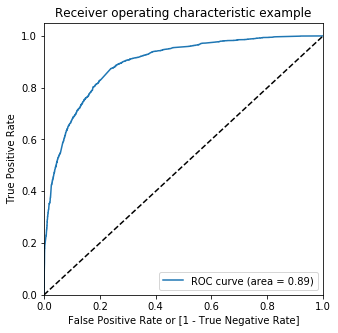

In [134]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [135]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.686156,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.549802,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.797383,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.120034,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.015456,1109,0,1,0,0,0,0,0,0,0,0,0


In [136]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.610127  0.977254  0.375842
0.2   0.2  0.768354  0.915110  0.674702
0.3   0.3  0.799209  0.880585  0.747278
0.4   0.4  0.813608  0.782697  0.833333
0.5   0.5  0.813924  0.704305  0.883878
0.6   0.6  0.808703  0.637287  0.918092
0.7   0.7  0.785918  0.531275  0.948419
0.8   0.8  0.766139  0.449228  0.968377
0.9   0.9  0.716614  0.291227  0.988077


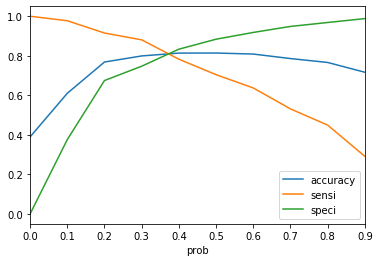

In [137]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [139]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.686156,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.549802,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.797383,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.120034,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.015456,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.686156,2240,1,1,1,1,1,1,1,1,0,0,0,1,69
1,0,0.549802,113,1,1,1,1,1,1,1,0,0,0,0,1,55
2,1,0.797383,4132,1,1,1,1,1,1,1,1,1,0,0,1,80
3,0,0.120034,5573,0,1,1,0,0,0,0,0,0,0,0,0,12
4,0,0.015456,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.051702,2282,0,1,0,0,0,0,0,0,0,0,0,0,5
6,1,0.753943,2976,1,1,1,1,1,1,1,1,1,0,0,1,75
7,0,0.422307,8431,0,1,1,1,1,1,0,0,0,0,0,1,42
8,1,0.828112,2770,1,1,1,1,1,1,1,1,1,1,0,1,83
9,1,0.996471,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [141]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1991
0     471
Name: final_predicted, dtype: int64

In [142]:
# check the precentage of final_predicted conversions

1991/float(1991+471)

0.8086921202274574

Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . Hence this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [144]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8140822784810127

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3154,  704],
       [ 471, 1991]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8086921202274574

In [148]:
# Let us calculate specificity

TN / float(TN+FP)

0.8175220321410057

In [149]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1824779678589943


In [150]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7387755102040816


In [151]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8700689655172413


##### Metrics - Precision and Recall

In [152]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3410,  448],
       [ 728, 1734]], dtype=int64)

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7946837763519706

In [155]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7043054427294883

### Precision and recall tradeoff

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64, 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [158]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

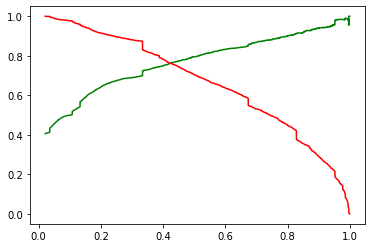

In [159]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [160]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [161]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable
2296,0,1.823128,1,0,0,0,0,0,0,0,0,0,0,1,0
8697,0,-0.131328,1,0,0,0,0,0,0,0,0,0,0,1,0
7378,0,-0.215588,1,0,0,0,0,0,0,0,0,0,0,0,0
8631,0,0.775378,0,0,0,0,0,0,0,0,0,0,0,0,0
4799,0,2.145513,0,0,0,0,0,0,0,0,0,0,0,1,0


In [162]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [163]:
y_test_pred = res.predict(X_test_sm)

In [164]:
y_test_pred[:10]

2296    0.910401
8697    0.532398
7378    0.200879
8631    0.504284
4799    0.951096
4503    0.387455
7129    0.930119
1717    0.133051
8398    0.843957
5116    0.333687
dtype: float64

In [208]:
y_test_df['LeadID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final = y_pred_final[['LeadID','Converted','Conv_Prob']]
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,LeadID,Converted,Conv_Prob,final_predicted
0,0,1,0.910401,1
1,1,0,0.532398,1
2,2,0,0.200879,0
3,3,0,0.504284,1
4,4,1,0.951096,1


In [209]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Conv_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadID,Converted,Conv_Prob,final_predicted,lead_score
0,0,1,0.910401,1,91
1,1,0,0.532398,1,53
2,2,0,0.200879,0,20
3,3,0,0.504284,1,50
4,4,1,0.951096,1,95
5,5,0,0.387455,1,39
6,6,0,0.930119,1,93
7,7,0,0.133051,0,13
8,8,0,0.843957,1,84
9,9,1,0.333687,0,33


In [210]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    820
0    195
Name: final_predicted, dtype: int64

In [211]:
# check the precentage of final_predicted conversions on test data

820/float(820+195)

0.8078817733990148

##### Hence we can see that the final prediction of conversions have a target rate of 80%)

####Check the measures

In [212]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1396,  298],
       [ 195,  820]], dtype=int64)

In [213]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [214]:
print('Accuracy: ', round(100*(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)), 2))
print('Sensitivity: ', round(100*(TP / float(TP+FN)), 2))
print('Specificity: ', round(100*(TN / float(TN+FP)), 2))
print('False positive rate: ', round(100*(FP/ float(TN+FP)), 2))
print('Positive predictive value: ', round(100*(TP / float(TP+FP)), 2))
print('Negative predictive value: ', round(100*(TN / float(TN+FN)), 2))
print('Precision: ', round(100*(TP / float(TP + FP)), 2))
print('Recall: ', round(100*(TP / float(TP + FN)), 2))

Accuracy:  81.8
Sensitivity:  80.79
Specificity:  82.41
False positive rate:  17.59
Positive predictive value:  73.35
Negative predictive value:  87.74
Precision:  73.35
Recall:  80.79


##### Precision and Recall metrics for the test set 

In [215]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7334525939177102
recall  0.8078817733990148


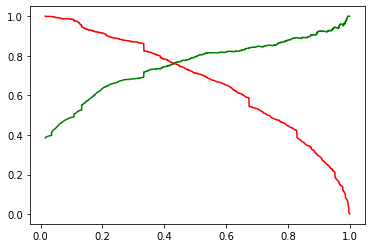

In [206]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conv_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

####Final dataset

In [207]:

#y_pred_final['lead_score'] = y_pred_final.Conv_Prob.map(lambda x: round(x*100))
#y_pred_final.head(20)
lead_data_pred = y_pred_final.sort_values('lead_score', axis = 0, ascending = False)
lead_data_pred.head(20)

,LeadID,Converted,Conv_Prob,final_predicted,lead_score
1678,1678,1,0.996471,1,100
238,238,1,0.997326,1,100
1088,1088,1,0.996471,1,100
1507,1507,1,0.996471,1,100
587,587,1,0.996471,1,100
1773,1773,1,0.995736,1,100
513,513,1,0.996471,1,100
90,90,1,0.996471,1,100
1323,1323,1,0.997874,1,100
1004,1004,1,0.996471,1,100


## Conclusion :
    
    - While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
      optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
    - Accuracy, Sensitivity and Specificity values of test set are around 82%, 81% and 82% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 80%
    - Hence overall this model seems to be good. 
    
    
### On Train Data:

| Metrics | Score |
| :- | :- |
| Accuracy | 81.4 % |
| Specificity | 81.75 % |
| Sensitivity | 80.8 % |
| Precision | 79.46 % |
| recall | 70.43 % |



### On Test Data:
| Metrics | Score |
| :- | :- |
| Accuracy |81.8 % |
| Specificity | 82.41 % |
| Sensitivity | 80.79 % |
| Precision | 73.34 % | 
| recall | 80.78 % |

